In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve,auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize, StandardScaler,RobustScaler

# Función para dibujar la matriz de confusión
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.show()

In [22]:
# Cargar datos desde un archivo CSV (asegúrate de tener un archivo CSV con la columna 'quality' como objetivo)
# Por ejemplo: df = pd.read_csv('ruta_a_tu_archivo.csv')
df = pd.read_csv('../../data/WineQT.csv')

# Separar características (X) y la variable objetivo (y)
X = df.drop(columns=['quality'])
y = df['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Clasification Report Random Forest:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.68      0.73      0.70       143
           6       0.61      0.66      0.64       146
           7       0.71      0.54      0.61        41
           8       1.00      0.25      0.40         4

    accuracy                           0.65       343
   macro avg       0.60      0.44      0.47       343
weighted avg       0.64      0.65      0.64       343



c:\Users\edgar\miniforge3\envs\machine_learning_ds02\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\edgar\miniforge3\envs\machine_learning_ds02\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\edgar\miniforge3\envs\machine_learning_ds02\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

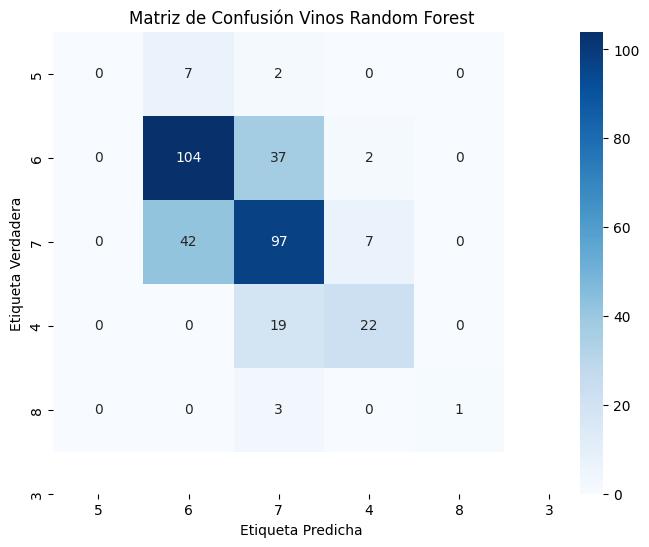

In [23]:
# Entrenar el modelo RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

# Mostrar el reporte de clasificación
print("\nClasification Report Random Forest:")
print(classification_report(y_test, y_pred))

# Crear y mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, y.unique(), "Matriz de Confusión Vinos Random Forest")

In [24]:
# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn.predict(X_test)


Clasification Report KNN:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.48      0.61      0.54       143
           6       0.48      0.43      0.45       146
           7       0.35      0.20      0.25        41
           8       0.00      0.00      0.00         4

    accuracy                           0.46       343
   macro avg       0.26      0.25      0.25       343
weighted avg       0.44      0.46      0.45       343



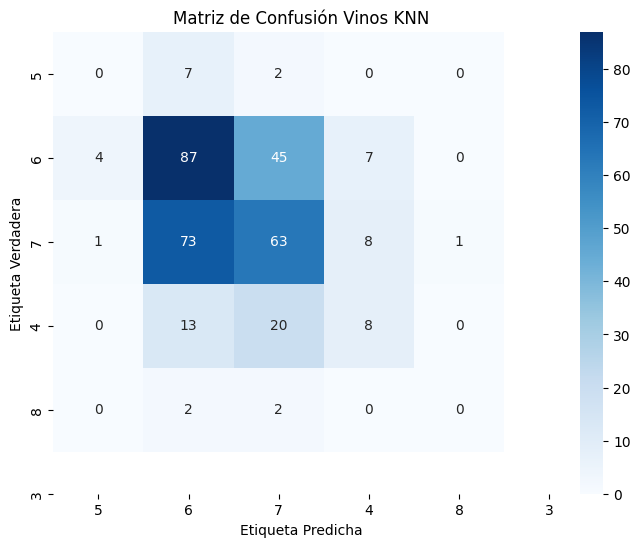

In [25]:
# Primero, mostramos un reporte con varias métricas sobre la clasificación
print("\nClasification Report KNN:")
print(classification_report(y_test, y_pred))

# Creamos la matriz de confusión, que nos dice cuántos aciertos y errores tuvimos
cm = confusion_matrix(y_test, y_pred)

# Esta función dibuja la matriz de confusión para que sea más fácil de ver
plot_confusion_matrix(cm, y.unique(), "Matriz de Confusión Vinos KNN")

In [26]:
# Crear el modelo de Regresión Logística con hiperparámetros específicos
model = LogisticRegression(penalty ='l2',           # Tipo de regularización L2 (Ridge)
C=1.0,                   # Inverso de la fuerza de regularización
solver='lbfgs',          # Algoritmo para la optimización
max_iter=100,            # Número máximo de iteraciones
tol=1e-4,                # Tolerancia para el criterio de parada
random_state=42)         # Semilla para la reproducibilidad

# Entrenar el modelo
model.fit(X_train, y_train)

c:\Users\edgar\miniforge3\envs\machine_learning_ds02\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [27]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)  # Probabilidades de la clase positiva


c:\Users\edgar\miniforge3\envs\machine_learning_ds02\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\edgar\miniforge3\envs\machine_learning_ds02\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Exactitud: 0.3935860058309038
Informe de Clasificación Regresión Logística:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         9
           5       0.66      0.48      0.56       143
           6       0.58      0.42      0.49       146
           7       0.14      0.12      0.13        41
           8       0.00      0.00      0.00         4

    accuracy                           0.39       343
   macro avg       0.23      0.17      0.20       343
weighted avg       0.54      0.39      0.46       343

Matriz de Confusión:


c:\Users\edgar\miniforge3\envs\machine_learning_ds02\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\edgar\miniforge3\envs\machine_learning_ds02\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\edgar\miniforge3\envs\machine_learning_ds02\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{met

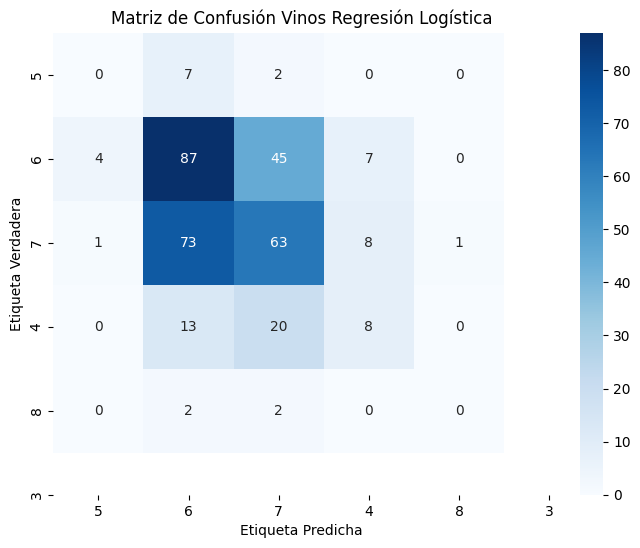

In [28]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación Regresión Logística:')
print(classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
# Esta función dibuja la matriz de confusión para que sea más fácil de ver
plot_confusion_matrix(cm, y.unique(), "Matriz de Confusión Vinos Regresión Logística")


Las metricas en este dataset no fueron de las mejores.
Randome Forest es la unica que mas o menos salio bien.
Pienso que se debe volver a revisar y consiferar Feeturing Engeeniering.